# **Neural Networks implemented in Python's Tensor flow**

## **Part 2, basic algorithms:**

### **Section 1, Linear Regression:**

    Lets import Tensorflow & Numpy again

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

    Here is some sample data to make a simple Linear Regression on

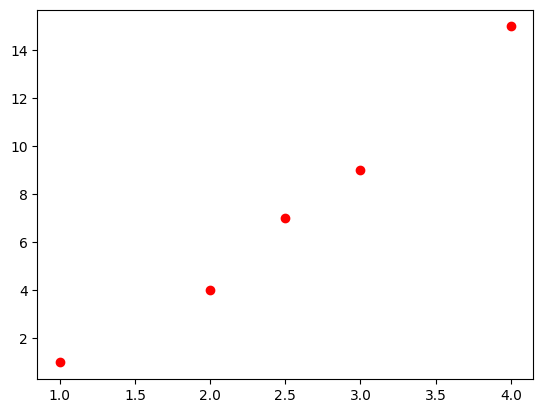

In [11]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
